In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/RSCCASN.csv', parse_dates=True, index_col='DATE')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [4]:
df


,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [6]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

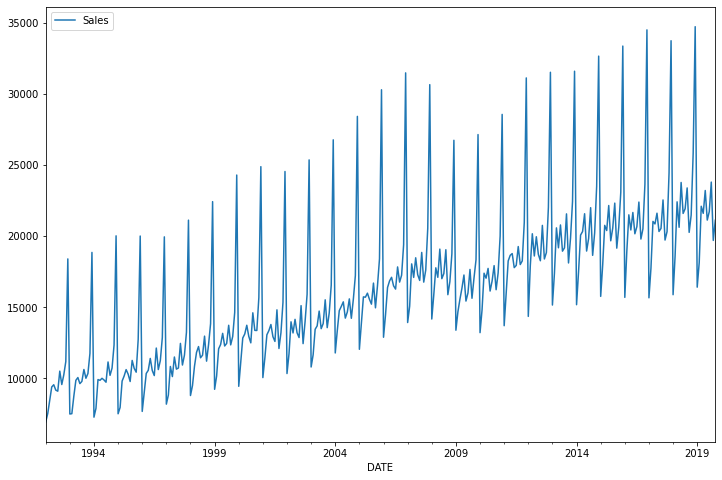

In [7]:
df.plot(figsize = (12,8))

In [9]:
len(df) - 18

316

In [10]:
test_size = 18
test_ind = len(df) - test_size

In [11]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [12]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(train)

MinMaxScaler()

In [16]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
len(test)

18

In [19]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=1)

In [20]:
X, y = generator[0]

In [21]:
X


array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [22]:
y

array([[0.02047633]])

In [23]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [25]:
n_features = 1

In [84]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')

In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [86]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience=8)

In [87]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length, batch_size=1)

In [88]:
model.fit_generator(generator, epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0252 - val_loss: 0.0038
Epoch 2/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0173 - val_loss: 0.0363
Epoch 3/20
304/304 [==============================] - 1s 4ms/step - loss: 0.0101 - val_loss: 0.0033
Epoch 4/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0147
Epoch 5/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0022 - val_loss: 0.0050
Epoch 6/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 7/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0017 - val_loss: 9.7786e-04
Epoch 8/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0015 - val_loss: 7.7307e-04
Epoch 9/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0013 - val_loss

In [89]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

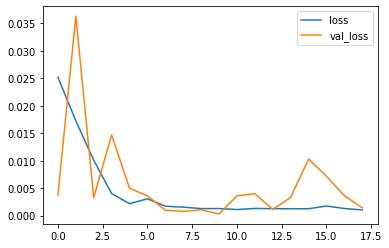

In [90]:
losses.plot()

In [93]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range (len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis =1)


In [94]:
true_predictions = scaler.inverse_transform(test_predictions)

In [95]:
test['Predictions'] = true_predictions

C:\Users\Dima\AppData\Local\Temp/ipykernel_1184/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [96]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22261.595258
2018-06-01,21589,21118.071822
2018-07-01,21919,21317.056888
2018-08-01,23381,23140.368393
2018-09-01,20260,20547.214708
2018-10-01,21473,21086.922893
2018-11-01,25831,25067.239868
2018-12-01,34706,35194.555764
2019-01-01,16410,16535.931038


<AxesSubplot:xlabel='DATE'>

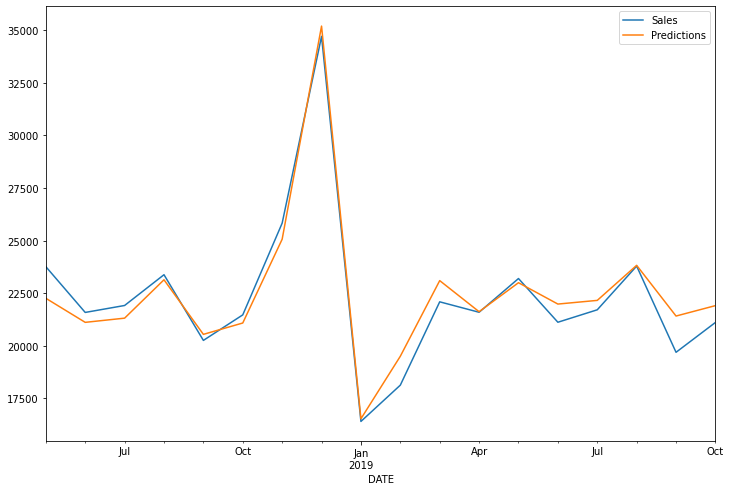

In [98]:
test.plot(figsize = (12,8))

In [99]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [124]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                               length=length, batch_size=1)

In [125]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=8)

Epoch 1/8
322/322 [==============================] - 2s 5ms/step - loss: 0.0237
Epoch 2/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0211
Epoch 3/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0142
Epoch 4/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 5/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 6/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 7/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0022A: 0s -
Epoch 8/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0013


In [139]:
forecast = []
periods = 18
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))
for i in range (len(test)):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis =1)


In [140]:
forecast = full_scaler.inverse_transform(forecast)

In [141]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [142]:
len(forecast)

18

In [143]:
forecast_index = pd.date_range(start = '2019-11-01', periods=periods,
                               freq='MS')

In [144]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', freq='MS')

In [145]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                          columns=['Forecast'])

In [146]:
forecast_df

,Forecast
2019-11-01,21791.510623
2019-12-01,20624.767314
2020-01-01,20899.212153
2020-02-01,22795.545013
2020-03-01,20140.646734
2020-04-01,20822.806035
2020-05-01,25001.368664
2020-06-01,35317.116539
2020-07-01,16194.211301
2020-08-01,18893.373622


<AxesSubplot:>

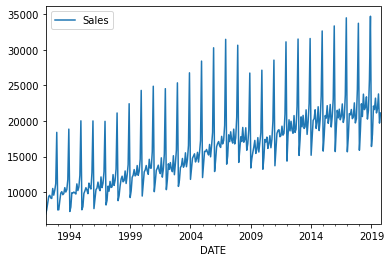

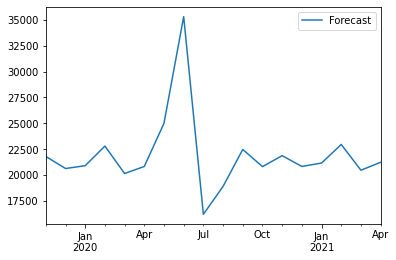

In [148]:
df.plot()
forecast_df.plot()

(576.0, 611.0)

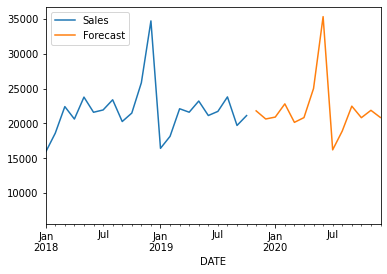

In [151]:
ax = df.plot()
forecast_df.plot(ax = ax)
plt.xlim('2018-01-01', '2020-12-01')